# Other Regression Models

## Decision Tree Regression 


In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
# Import the cleaned dataset with no outliers and encoded
df = pd.read_csv('CO2 Emissions_Canada_cleaned_removed_outliers_encoded.csv')
df.drop(df.columns[0], axis=1, inplace=True)

print("Data type : ", type(df))
print("Data dims : ", df.shape)

df.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (5965, 31)


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,...,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,221,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,136,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,255,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,244,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
print(df.dtypes)

Engine Size(L)                            float64
Cylinders                                   int64
Fuel Consumption Comb (L/100 km)          float64
CO2 Emissions(g/km)                         int64
Number of Gears                             int64
Vehicle Class_COMPACT                     float64
Vehicle Class_FULL-SIZE                   float64
Vehicle Class_MID-SIZE                    float64
Vehicle Class_MINICOMPACT                 float64
Vehicle Class_MINIVAN                     float64
Vehicle Class_PICKUP TRUCK - SMALL        float64
Vehicle Class_PICKUP TRUCK - STANDARD     float64
Vehicle Class_SPECIAL PURPOSE VEHICLE     float64
Vehicle Class_STATION WAGON - MID-SIZE    float64
Vehicle Class_STATION WAGON - SMALL       float64
Vehicle Class_SUBCOMPACT                  float64
Vehicle Class_SUV - SMALL                 float64
Vehicle Class_SUV - STANDARD              float64
Vehicle Class_TWO-SEATER                  float64
Vehicle Class_VAN - CARGO                 float64


### Multi-Variate Decision Tree Regression


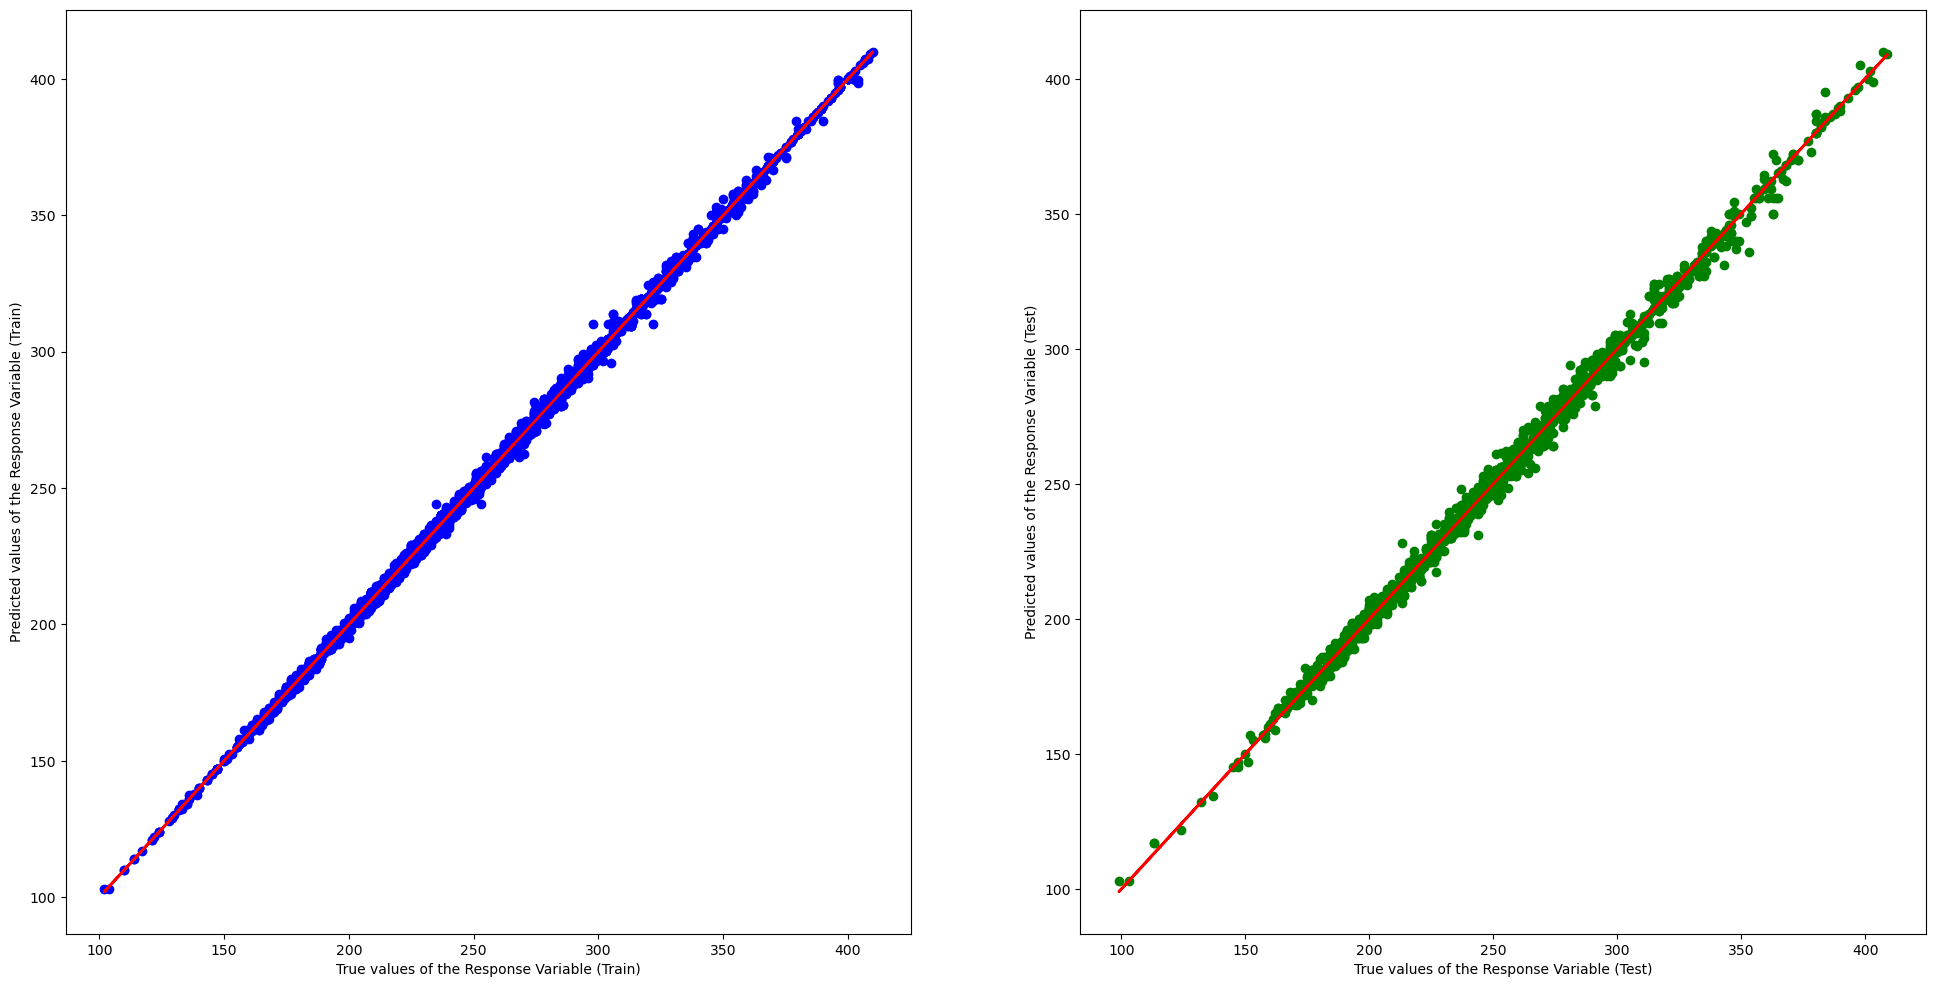

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) on Train Set 	: 0.9993359557900833
Mean Squared Error (MSE) on Train Set 	: 1.9588009296761815
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) on Test Set 	: 0.9965537103459958
Mean Squared Error (MSE) on Test Set 	: 9.98471813645371


In [46]:
# Import important functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']
# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

#DecisionTreeRegression
regress = DecisionTreeRegressor()
regress.fit(X_train, y_train)

#Plot
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


#Goodness of fit 
from sklearn.metrics import r2_score
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

## Random Forest Regression

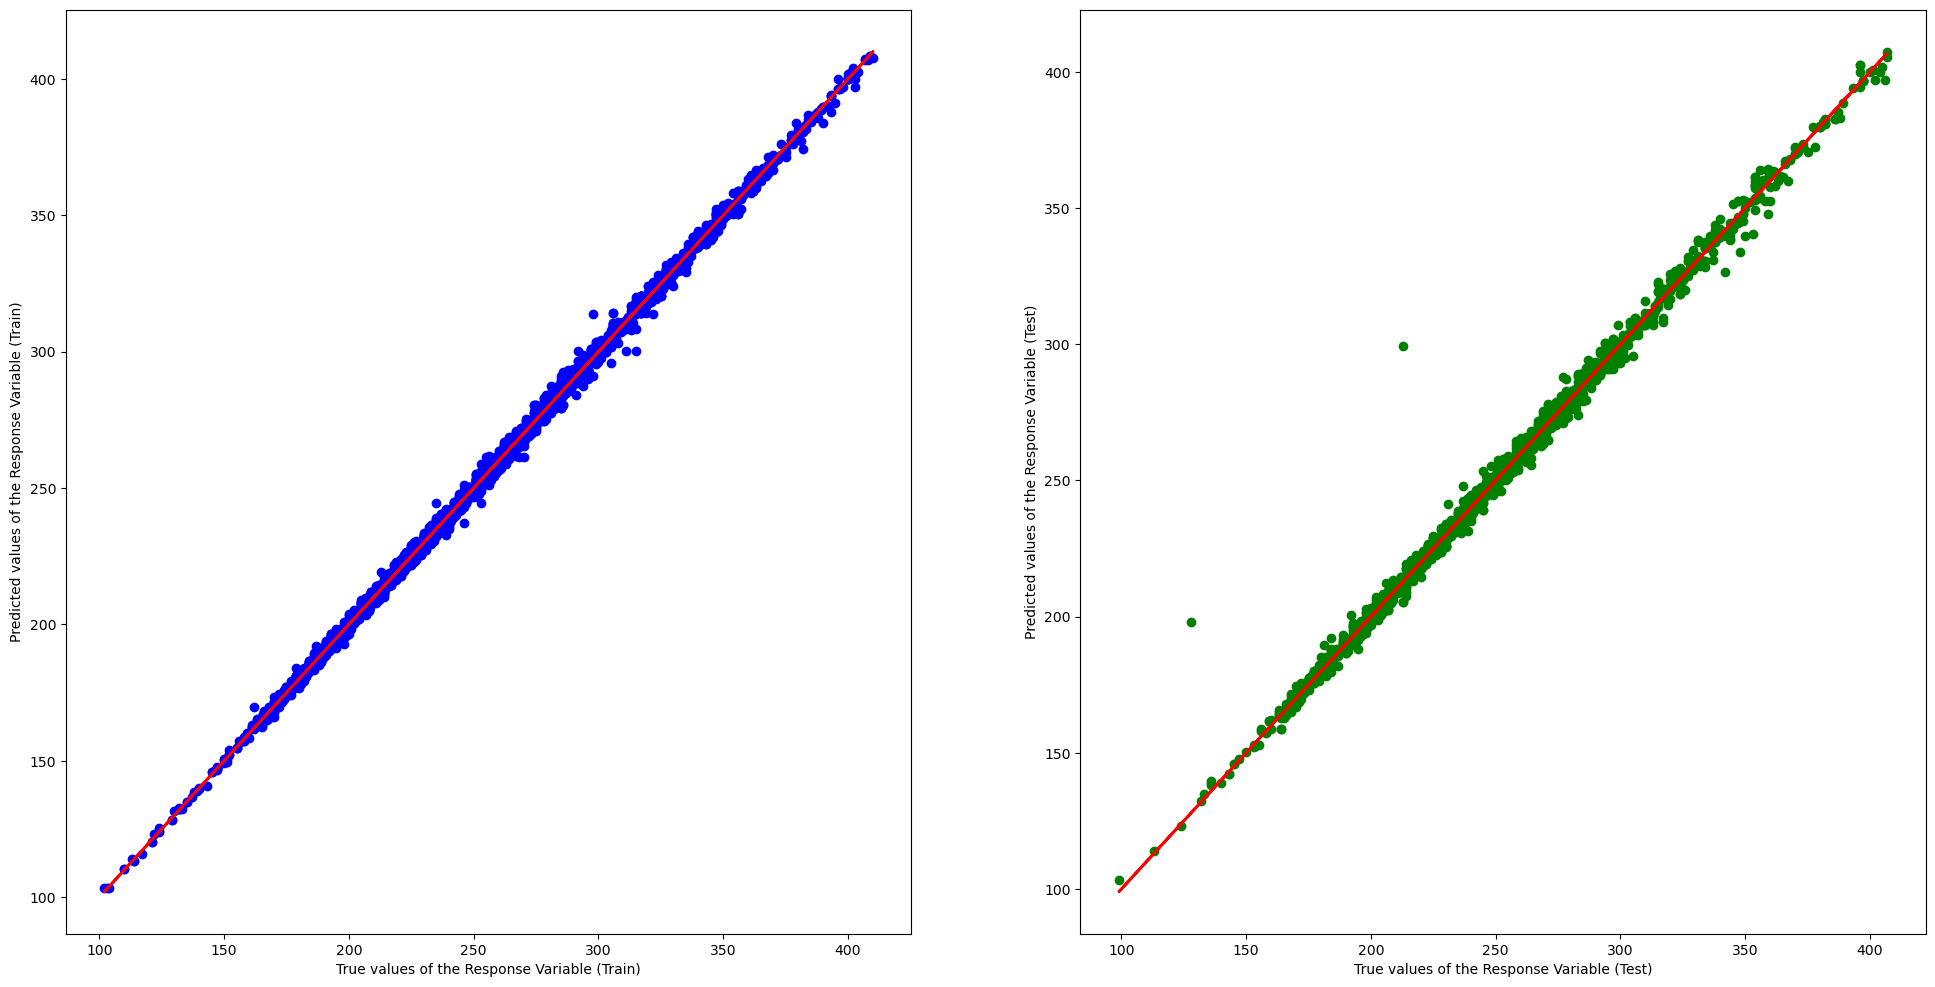

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) on Train Set 	: 0.9990741750266219
Mean Squared Error (MSE) on Train Set 	: 2.6724837573452564
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) on Test Set 	: 0.9948344956932049
Mean Squared Error (MSE) on Test Set 	: 15.93767998148948


In [52]:
# Import important functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']
# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

#RandomForestRegression
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

#Plot
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


#Goodness of fit 
from sklearn.metrics import r2_score
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))